In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

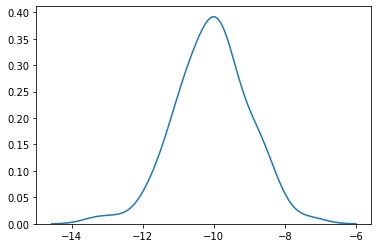

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0738: 100%|██████████| 1500/1500 [00:13<00:00, 114.57it/s]


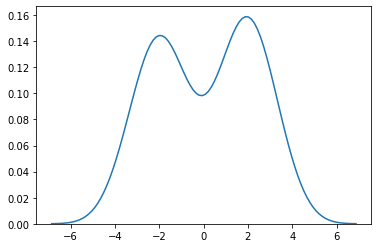

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([-0.2652662 , -2.371083  ,  1.3989412 ,  1.6130078 ,
             -1.9474783 ,  2.1664143 ,  2.2536783 ,  1.0680357 ,
              1.2525878 , -1.5777572 ,  2.6372313 , -2.2588532 ,
             -1.9284706 ,  1.8143153 ,  0.4115454 ,  0.25762394,
             -1.7618611 , -1.5954521 , -3.282602  , -2.0734918 ,
             -1.653257  , -1.236571  , -3.1961622 , -1.088629  ,
             -3.6569123 , -2.6313448 ,  1.4933864 ,  1.2062467 ,
              3.4222064 ,  1.9572295 , -2.7857745 ,  0.8399287 ,
             -2.6015966 ,  2.3808265 ,  3.676633  , -2.450038  ,
              2.421275  ,  0.23976336,  0.7802553 , -0.36470568,
             -3.3846009 , -3.7490377 ,  0.60632366, -1.4088653 ,
             -0.93672305,  1.7122484 , -0.02836718,  2.9320397 ,
             -1.3129555 , -2.629287  ,  2.7450986 , -2.8851593 ,
              2.0276687 , -0.5373888 , -3.132915  ,  0.9532865 ,
             -2.1518834 , -0.82694733,  0.7105437 ,  3.3507779 ,
             -2.145937  ,